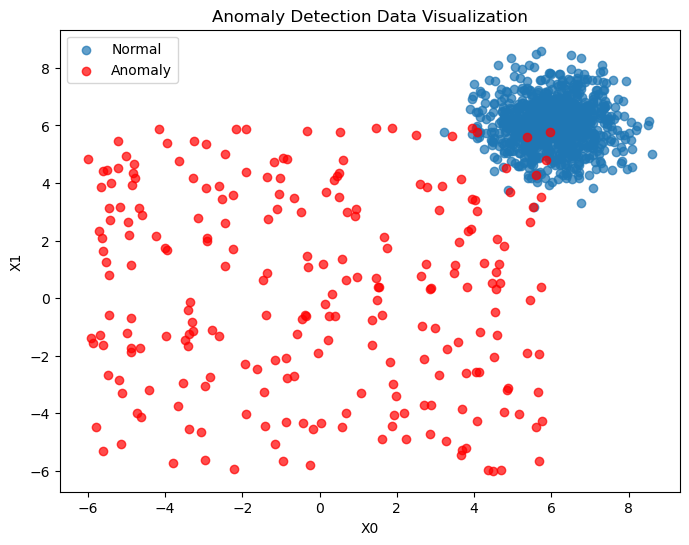

In [4]:
import matplotlib.pyplot as plt
import pandas as pd


## TASK 0:

data = pd.read_csv('anomaly_data.csv')

# Separate the features and labels
X, y = data.iloc[:, :2], data.iloc[:, -1]

# Separate normal and anomaly samples
normal_samples = data[data['y'] == 0]
anomaly_samples = data[data['y'] == 1]

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(normal_samples['X0'], normal_samples['X1'], label='Normal', alpha=0.7)
plt.scatter(anomaly_samples['X0'], anomaly_samples['X1'], label='Anomaly', color='red', alpha=0.7)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Anomaly Detection Data Visualization')
plt.legend()
plt.show()

0.8235443940706025
0.47543629862524744


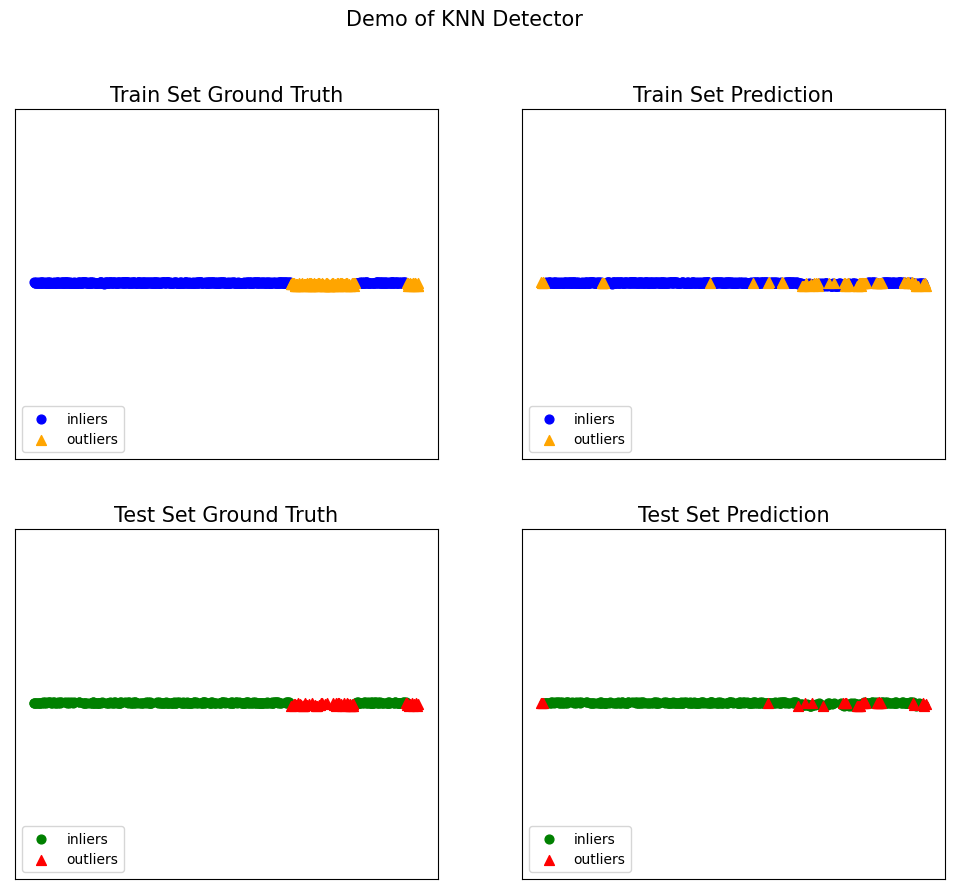

In [15]:
from pyod.models.knn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score
from pyod.utils.example import visualize

#Task1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = KNN(n_neighbors=10, method="largest", metric="euclidean")
clf.fit(X=X_train)

y_train_scores = clf.decision_scores_  # Outlier scores on the training data
y_train_pred = clf.labels_  # Binary labels (0: inliers, 1: outliers) on the training data

y_test_scores = clf.decision_function(X_test)  # outlier scores
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)

roc_auc = roc_auc_score(y_test, y_test_scores)
print(roc_auc)
avg_precision = average_precision_score(y_test, y_test_scores)
print(avg_precision)

visualize("KNN", X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)


n_neighbors: 2, method: largest, ROC AUC: 0.8330, Average Precision: 0.5513
n_neighbors: 2, method: mean, ROC AUC: 0.8024, Average Precision: 0.4919
n_neighbors: 2, method: median, ROC AUC: 0.8024, Average Precision: 0.4919
n_neighbors: 4, method: largest, ROC AUC: 0.8751, Average Precision: 0.6817
n_neighbors: 4, method: mean, ROC AUC: 0.8560, Average Precision: 0.6050
n_neighbors: 4, method: median, ROC AUC: 0.8549, Average Precision: 0.6057
n_neighbors: 6, method: largest, ROC AUC: 0.9290, Average Precision: 0.7389
n_neighbors: 6, method: mean, ROC AUC: 0.8920, Average Precision: 0.6755
n_neighbors: 6, method: median, ROC AUC: 0.8706, Average Precision: 0.6720
n_neighbors: 8, method: largest, ROC AUC: 0.9457, Average Precision: 0.7758
n_neighbors: 8, method: mean, ROC AUC: 0.9243, Average Precision: 0.7267
n_neighbors: 8, method: median, ROC AUC: 0.8952, Average Precision: 0.6972
n_neighbors: 10, method: largest, ROC AUC: 0.9551, Average Precision: 0.7924
n_neighbors: 10, method: me

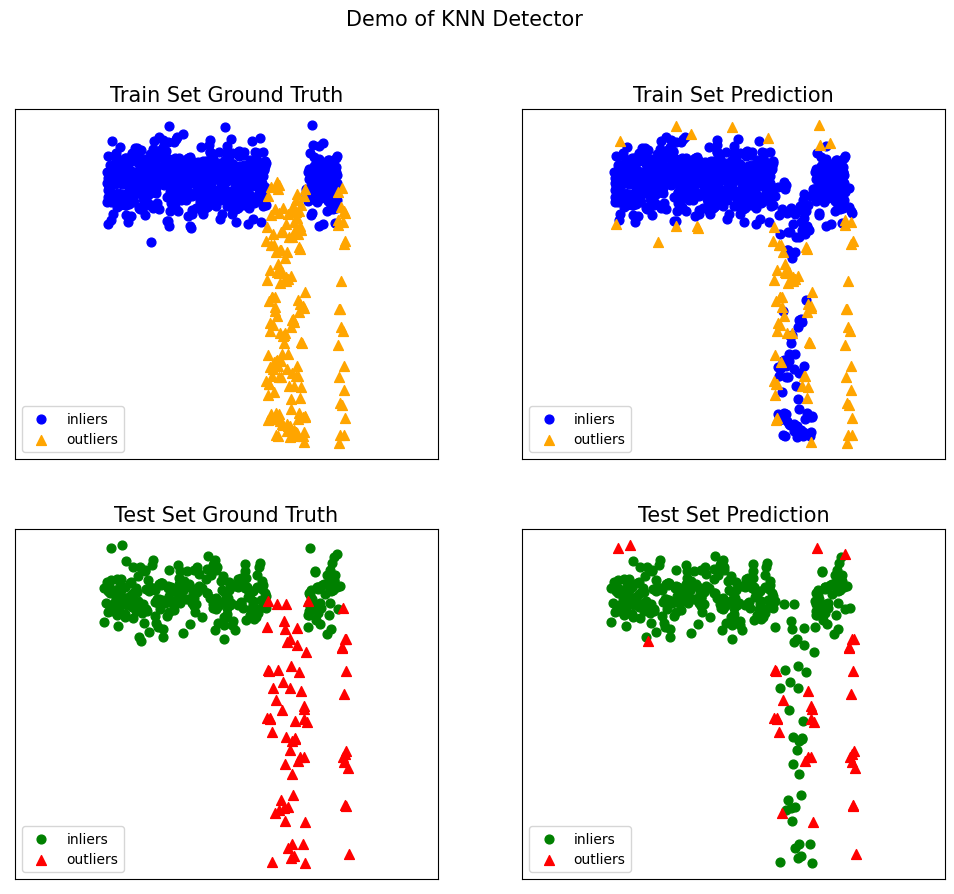

In [17]:
from sklearn.preprocessing import StandardScaler

# Task 2

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Step 2: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define hyperparameter ranges
n_neighbors_list = list(range(2, 21, 2))  # [2, 4, 6, ..., 20]
methods = ['largest', 'mean', 'median']

# Step 4: Initialize variables to store the best results
best_auc = 0
best_avg_precision = 0
best_params_auc = {'n_neighbors': None, 'method': None}
best_params_avg_precision = {'n_neighbors': None, 'method': None}

# Step 5: Perform exhaustive search over hyperparameters
for n_neighbors in n_neighbors_list:
    for method in methods:
        # Initialize the KNN outlier detection model with current hyperparameters
        clf = KNN(n_neighbors=n_neighbors, method=method, metric="euclidean")
        
        # Fit the model on the training data
        clf.fit(X_train)
        
        # Get the outlier scores on the test data
        y_test_scores = clf.decision_function(X_test)
        
        # Calculate performance metrics
        roc_auc = roc_auc_score(y_test, y_test_scores)
        avg_precision = average_precision_score(y_test, y_test_scores)
        
        # Print the results for each combination
        print(f"n_neighbors: {n_neighbors}, method: {method}, ROC AUC: {roc_auc:.4f}, Average Precision: {avg_precision:.4f}")
        
        # Update the best parameters based on ROC AUC
        if roc_auc > best_auc:
            best_auc = roc_auc
            best_params_auc['n_neighbors'] = n_neighbors
            best_params_auc['method'] = method
        
        # Update the best parameters based on Average Precision
        if avg_precision > best_avg_precision:
            best_avg_precision = avg_precision
            best_params_avg_precision['n_neighbors'] = n_neighbors
            best_params_avg_precision['method'] = method

# Step 6: Report the best hyperparameters
print("\nBest hyperparameters based on ROC AUC:")
print(f"n_neighbors: {best_params_auc['n_neighbors']}, method: {best_params_auc['method']}, ROC AUC: {best_auc:.4f}")

print("\nBest hyperparameters based on Average Precision:")
print(f"n_neighbors: {best_params_avg_precision['n_neighbors']}, method: {best_params_avg_precision['method']}, Average Precision: {best_avg_precision:.4f}")

# Step 7: Visualize the results using the best hyperparameters (based on ROC AUC)
clf_best = KNN(n_neighbors=best_params_auc['n_neighbors'], method=best_params_auc['method'], metric="euclidean")
clf_best.fit(X_train)
y_train_pred = clf_best.labels_
y_test_scores = clf_best.decision_function(X_test)
y_test_pred = clf_best.predict(X_test)

# Visualize the results
visualize(
    "KNN",
    X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
    show_figure=True,
    save_figure=False
)

ROC AUC Score: 0.3588
Average Precision Score: 0.1513


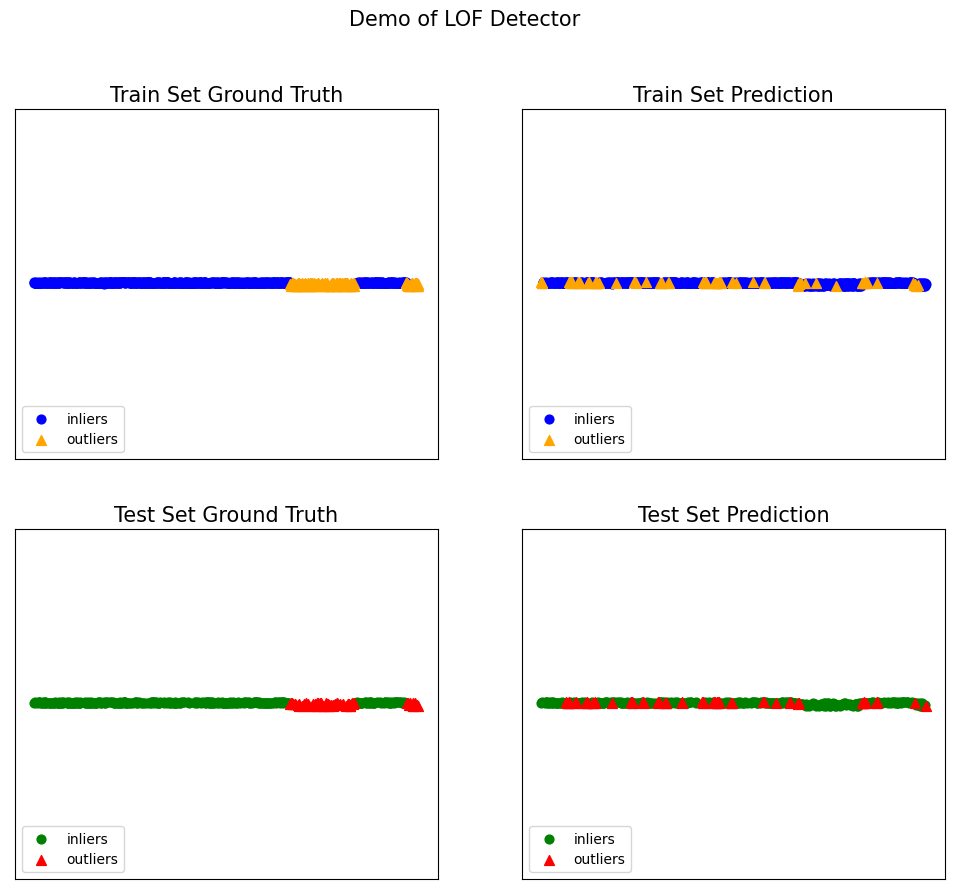

n_neighbors: 2, ROC AUC: 0.5018, Average Precision: 0.2694
n_neighbors: 4, ROC AUC: 0.4747, Average Precision: 0.2414
n_neighbors: 6, ROC AUC: 0.5014, Average Precision: 0.2223
n_neighbors: 8, ROC AUC: 0.5888, Average Precision: 0.2755
n_neighbors: 10, ROC AUC: 0.5929, Average Precision: 0.2974
n_neighbors: 12, ROC AUC: 0.5874, Average Precision: 0.3102
n_neighbors: 14, ROC AUC: 0.5707, Average Precision: 0.3021
n_neighbors: 16, ROC AUC: 0.5765, Average Precision: 0.3084
n_neighbors: 18, ROC AUC: 0.5846, Average Precision: 0.3066
n_neighbors: 20, ROC AUC: 0.6034, Average Precision: 0.3141

Best n_neighbors based on ROC AUC:
n_neighbors: 20, ROC AUC: 0.6034

Best n_neighbors based on Average Precision:
n_neighbors: 20, Average Precision: 0.3141


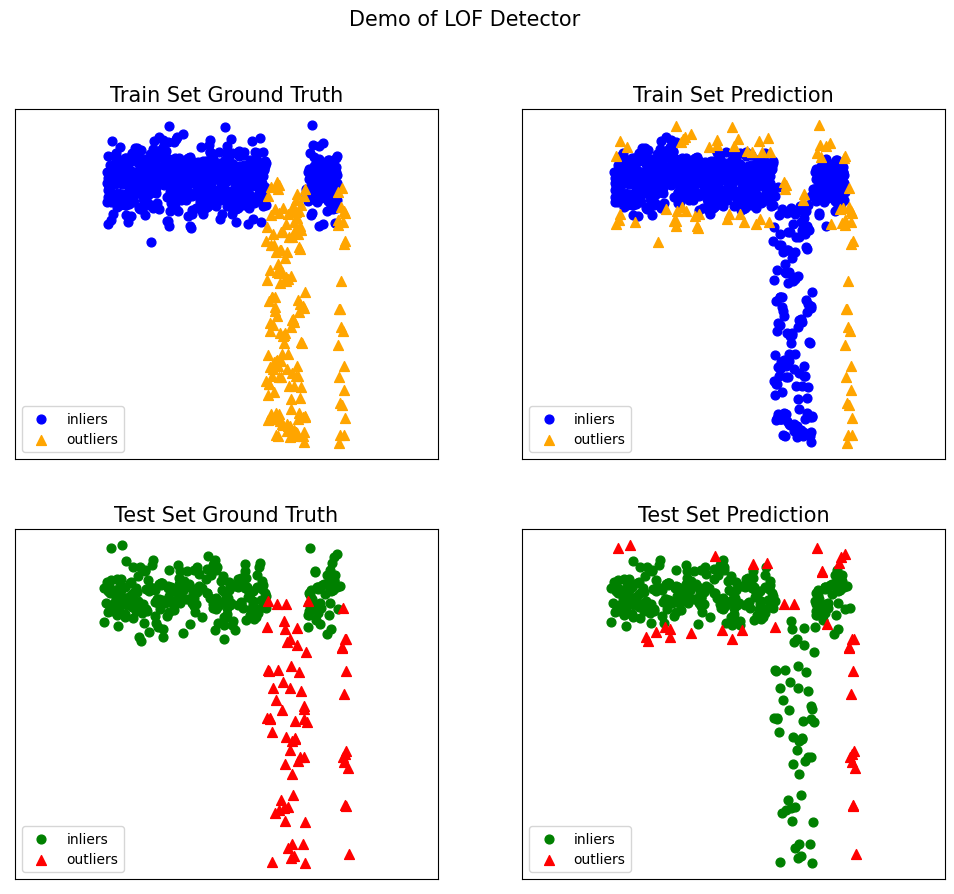

In [21]:
from pyod.models.lof import LOF

# Task 3

# ############################################################  Repeat Task 1 with LOF instead

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Step 2: Initialize the LOF model
clf = LOF(n_neighbors=10, metric="euclidean")

# Step 3: Fit the model on the training data
clf.fit(X_train)

# Step 4: Get the outlier scores and predictions
y_train_scores = clf.decision_scores_  # Outlier scores on the training data
y_train_pred = clf.labels_  # Predicted labels on the training data

y_test_scores = clf.decision_function(X_test)  # Outlier scores on the test data
y_test_pred = clf.predict(X_test)  # Predicted labels on the test data

# Step 5: Evaluate the model
roc_auc = roc_auc_score(y_test, y_test_scores)
print(f"ROC AUC Score: {roc_auc:.4f}")

avg_precision = average_precision_score(y_test, y_test_scores)
print(f"Average Precision Score: {avg_precision:.4f}")

# Step 6: Visualize the results
visualize(
    "LOF",
    X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
    show_figure=True,
    save_figure=False
)

############################################################  Repeat Task 2 with LOF instead
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

# Step 2: Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define hyperparameter range
n_neighbors_list = list(range(2, 21, 2))  # [2, 4, 6, ..., 20]

# Step 4: Initialize variables to store the best results
best_auc = 0
best_avg_precision = 0
best_n_neighbors_auc = None
best_n_neighbors_avg_precision = None

# Step 5: Perform exhaustive search over n_neighbors
for n_neighbors in n_neighbors_list:
    # Initialize the LOF model with current n_neighbors
    clf = LOF(n_neighbors=n_neighbors, metric="euclidean")
    
    # Fit the model on the training data
    clf.fit(X_train)
    
    # Get the outlier scores on the test data
    y_test_scores = clf.decision_function(X_test)
    
    # Calculate performance metrics
    roc_auc = roc_auc_score(y_test, y_test_scores)
    avg_precision = average_precision_score(y_test, y_test_scores)
    
    # Print the results for each n_neighbors
    print(f"n_neighbors: {n_neighbors}, ROC AUC: {roc_auc:.4f}, Average Precision: {avg_precision:.4f}")
    
    # Update the best parameters based on ROC AUC
    if roc_auc > best_auc:
        best_auc = roc_auc
        best_n_neighbors_auc = n_neighbors
    
    # Update the best parameters based on Average Precision
    if avg_precision > best_avg_precision:
        best_avg_precision = avg_precision
        best_n_neighbors_avg_precision = n_neighbors

# Step 6: Report the best n_neighbors
print("\nBest n_neighbors based on ROC AUC:")
print(f"n_neighbors: {best_n_neighbors_auc}, ROC AUC: {best_auc:.4f}")

print("\nBest n_neighbors based on Average Precision:")
print(f"n_neighbors: {best_n_neighbors_avg_precision}, Average Precision: {best_avg_precision:.4f}")

# Step 7: Visualize the results using the best n_neighbors (based on ROC AUC)
clf_best = LOF(n_neighbors=best_n_neighbors_auc, metric="euclidean")
clf_best.fit(X_train)
y_train_pred = clf_best.labels_
y_test_scores = clf_best.decision_function(X_test)
y_test_pred = clf_best.predict(X_test)

# Visualize the results
visualize(
    "LOF",
    X_train,
    y_train,
    X_test,
    y_test,
    y_train_pred,
    y_test_pred,
    show_figure=True,
    save_figure=False
)

In [22]:
# Task 4
import pandas as pd
import numpy as np
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, average_precision_score


# Load the cardio.csv dataset
data = pd.read_csv('cardio.csv')

# Features are all columns except 'y'; 'y' indicates anomalies (1) or normal (0)
X = data.drop('y', axis=1).values
y = data['y'].values

# Optional: Scale the features for algorithms sensitive to feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets; stratify by 'y' to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize models with default settings
clf_lof = LOF()
clf_iforest = IForest()
clf_ocsvm = OCSVM()

# Fit the models on the training data
clf_lof.fit(X_train)
clf_iforest.fit(X_train)
clf_ocsvm.fit(X_train)

# Function to evaluate a model
def evaluate_model(clf, X_test, y_test):
    y_test_scores = clf.decision_function(X_test)  # Raw outlier scores
    roc_auc = roc_auc_score(y_test, y_test_scores)
    avg_precision = average_precision_score(y_test, y_test_scores)
    return roc_auc, avg_precision

# Evaluate each model
roc_auc_lof, avg_precision_lof = evaluate_model(clf_lof, X_test, y_test)
roc_auc_iforest, avg_precision_iforest = evaluate_model(clf_iforest, X_test, y_test)
roc_auc_ocsvm, avg_precision_ocsvm = evaluate_model(clf_ocsvm, X_test, y_test)

# Report Results
print("Local Outlier Factor (LOF):")
print(f"ROC-AUC Score: {roc_auc_lof:.4f}")
print(f"Average Precision Score: {avg_precision_lof:.4f}\n")

print("Isolation Forest (IForest):")
print(f"ROC-AUC Score: {roc_auc_iforest:.4f}")
print(f"Average Precision Score: {avg_precision_iforest:.4f}\n")

print("One-Class SVM (OCSVM):")
print(f"ROC-AUC Score: {roc_auc_ocsvm:.4f}")
print(f"Average Precision Score: {avg_precision_ocsvm:.4f}")




Local Outlier Factor (LOF):
ROC-AUC Score: 0.5615
Average Precision Score: 0.1710

Isolation Forest (IForest):
ROC-AUC Score: 0.9319
Average Precision Score: 0.5872

One-Class SVM (OCSVM):
ROC-AUC Score: 0.9531
Average Precision Score: 0.5754
